<a href="https://colab.research.google.com/github/rokeya160210/Assignment1/blob/main/Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Real estate price

In [3]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Machine Learning/Real estate.csv')


In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
df = df.drop(['No','X5 latitude','X6 longitude'], axis=1)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [6]:
df['X1 transaction date'] = df['X1 transaction date'].astype(str).str.extract(r'^(\d{4})')[0]
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    object 
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 16.3+ KB


In [8]:
df['X1 transaction date'] = df['X1 transaction date'].astype(int)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    int64  
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 16.3 KB


### Dataset Explanation

1. **X1 transaction date** (`int32`):  
   - Represents the year of the transaction, indicating when the real estate sale occurred.  
   - Example: 2012 or 2013.

2. **X2 house age** (`float64`):  
   - The age of the house in years at the time of the transaction.  
   - Example: 32.0 means the house is 32 years old.

3. **X3 distance to the nearest MRT station** (`float64`):  
   - The distance from the house to the nearest MRT station, measured in meters.  
   - Example: 84.87882 meters.

4. **X4 number of convenience stores** (`int64`):  
   - The number of convenience stores within a certain vicinity of the house.  
   - Example: 10 means there are 10 convenience stores nearby.

5. **Y house price of unit area** (`float64`):  
   - The price per unit area (e.g., per square meter) of the house during the transaction.  
   - Example: 37.9 means 37.9 currency units per square meter.


# **Continue**

### Steps for Regression Analysis

#### **1. Split the Dataset**
- Split the data into **training (70%)** and **testing (30%)** subsets.
- Use the `train_test_split` function to ensure randomness in the split.
- Define:
  - **Features (X)**: `X1 transaction date`, `X2 house age`, `X3 distance to the nearest MRT station`, `X4 number of convenience stores`.
  - **Target (Y)**: `Y house price of unit area`.

#### **2. Check Correlation**
- Compute the correlation matrix to understand the relationships between features and the target variable.
- Visualize the correlation matrix using a **heatmap**:
  - Strong correlations between features and the target suggest potential predictors.
  - Identify multicollinearity (strong correlations between features), which might affect regression models.

#### **3. Apply Regression Models**

**a. Linear Regression**
1. Train a **Linear Regression** model using the training data.
2. Predict the target values using the testing data.

**b. Polynomial Regression**
1. Use `PolynomialFeatures` to generate polynomial terms for the features (e.g., degree = 2 or 3).
2. Train a **Linear Regression** model on the transformed polynomial features.
3. Predict the target values using the transformed testing data.

#### **4. Evaluate Model Performance**
- Evaluate both Linear and Polynomial Regression models using:
  1. **Mean Squared Error (MSE)**:
     - Measures the average squared difference between predicted and actual values.
     - Lower MSE indicates better performance.
  2. **R-squared (R²)**:
     - Measures how well the model explains the variability of the target variable.
     - Higher R² indicates better performance.
- Compare the results to determine which model performs better.

#### **5. Visualize Results**
- Plot **actual vs. predicted values** for both Linear and Polynomial Regression.
- For Polynomial Regression, visualize the curve fitting to see how well it models the data.


# *Step -1  Split the Dataset*

In [13]:
df.head(3)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3


In [15]:
x = df.drop(['Y house price of unit area'], axis=1)

In [26]:
df.head(3)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3


In [17]:
y = df['Y house price of unit area']

In [18]:
y

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


In [118]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=0)

In [22]:
xtrain.shape

(310, 4)

In [23]:
xtrain.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
322,2013,12.9,187.4823,1
208,2012,11.5,1360.1390,1
56,2013,33.6,371.2495,8
8,2013,31.7,5512.0380,1
312,2013,35.4,318.5292,9


# Check Correlation

In [41]:
correlation_matrix = df.corr()  # Step 1: Calculate the correlation matrix

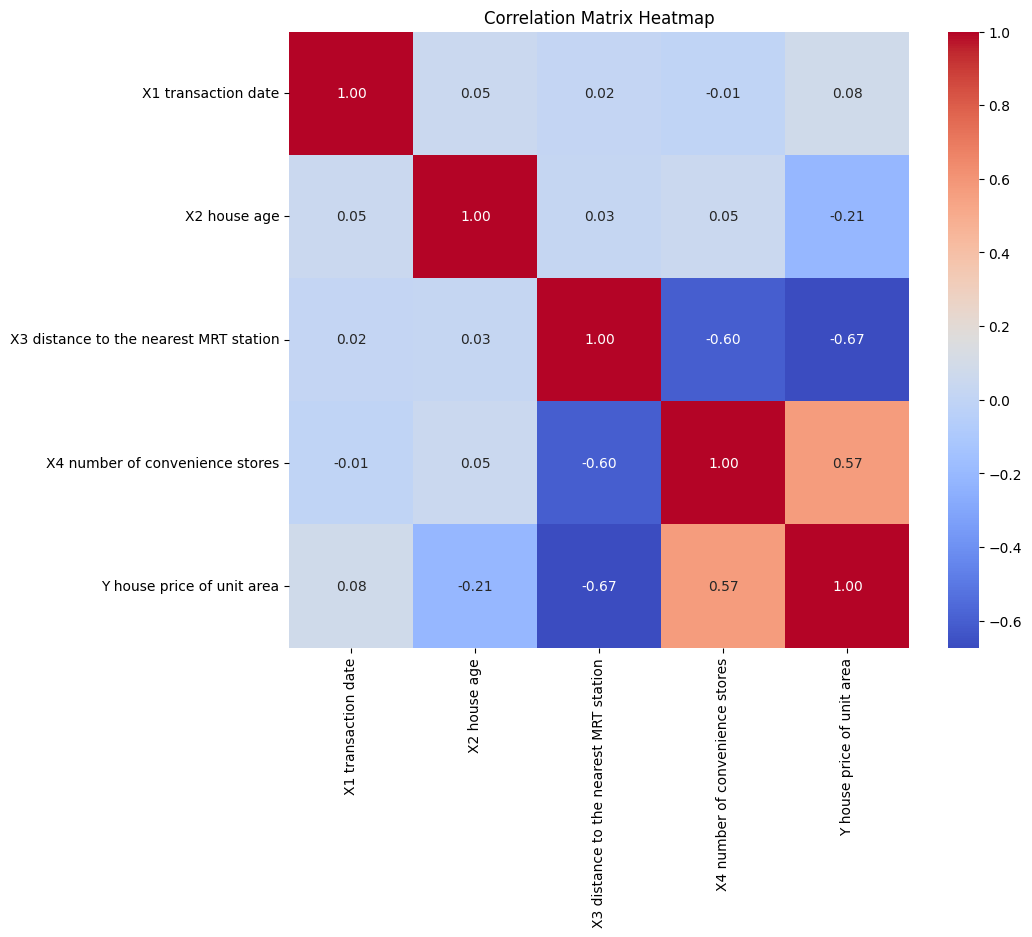

In [42]:
# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Apply Regression Models**

# Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

In [66]:
model = LinearRegression()

In [67]:
model.fit(xtrain, ytrain)

LinearRegression()

In [119]:
y_pred = model.predict(xtest)

In [105]:
y_pred

array([38.5206896 , 13.84814199, 41.70971772, 13.49083338, 41.08612856,
       42.89567789, 43.5155971 , 34.70920554, 49.26281986, 44.38731065,
       48.71609944, 45.65797771, 38.04937568, 44.03705625, 46.178929  ,
       35.88995319, 42.57243066, 39.94107177, 41.52177625, 41.5922418 ,
       50.71259903, 35.25866137, 34.45185813, 45.20948682, 44.4715726 ,
       44.2063524 , 47.70224643, 26.55561818, 47.3410097 , 21.72944302,
       48.08593548, 35.25501999, 40.76098446, 34.84252378, 44.45964821,
       35.20859867, 48.32621079, 38.50402461, 50.17414747,  3.67488745,
       54.16489237, 30.99358026, 32.76837079, 48.61512218, 18.08256942,
       48.44179988, 41.13399232, 14.94833142, 33.72292588, 52.06765218,
       53.8801032 , 38.02792454, 46.09087692, 29.89487051, 35.28369271,
       34.33751396, 47.77773134, 41.53643402, 45.44846987, 35.35514538,
       42.53106648, 43.99141124, 39.73404273, 46.04525299, 39.36252137,
       31.17173036, 10.52065732, 32.40043869, 44.58519582, 42.89

In [120]:
mse = mean_squared_error(ytest, y_pred)
print('MSE:', mse)

MSE: 75.72095513736194


In [106]:
model.score(xtrain, ytrain)# train data -> training accuracy

0.5478042305816059

In [140]:
model.score(xtest, ytest)# test data -> testing accuracy

0.555691360300036

# Polynomial Regression

In [71]:
x.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
0,2012,32.0,84.87882,10
1,2012,19.5,306.59470,9
2,2013,13.3,561.98450,5
3,2013,13.3,561.98450,5
4,2012,5.0,390.56840,5


In [72]:
y.head()

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [108]:
poly = PolynomialFeatures(degree=2)     # polynomial regression with degree n
X_poly = poly.fit_transform(x)

In [109]:
X_poly.shape

(414, 15)

In [54]:
# X_poly

array([[1.00000000e+00, 2.01300000e+03, 1.29000000e+01, ...,
        3.51496128e+04, 1.87482300e+02, 1.00000000e+00],
       [1.00000000e+00, 2.01200000e+03, 1.15000000e+01, ...,
        1.84997810e+06, 1.36013900e+03, 1.00000000e+00],
       [1.00000000e+00, 2.01300000e+03, 3.36000000e+01, ...,
        1.10260953e+06, 2.37599680e+04, 5.12000000e+02],
       ...,
       [1.00000000e+00, 2.01300000e+03, 1.36000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.01300000e+03, 3.59000000e+01, ...,
        1.23163978e+06, 5.76665190e+03, 2.70000000e+01],
       [1.00000000e+00, 2.01300000e+03, 6.60000000e+00, ...,
        7.36406891e+04, 7.32694086e+03, 7.29000000e+02]])

In [110]:
pd.DataFrame(X_poly).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,2012.0,32.0,84.87882,10.0,4048144.0,64384.0,1.707762e+05,20120.0,1024.00,2716.12224,320.0,7204.414085,848.7882,100.0
1,1.0,2012.0,19.5,306.59470,9.0,4048144.0,39234.0,6.168685e+05,18108.0,380.25,5978.59665,175.5,94000.310068,2759.3523,81.0
2,1.0,2013.0,13.3,561.98450,5.0,4052169.0,26772.9,1.131275e+06,10065.0,176.89,7474.39385,66.5,315826.578240,2809.9225,25.0
3,1.0,2013.0,13.3,561.98450,5.0,4052169.0,26772.9,1.131275e+06,10065.0,176.89,7474.39385,66.5,315826.578240,2809.9225,25.0
4,1.0,2012.0,5.0,390.56840,5.0,4048144.0,10060.0,7.858236e+05,10060.0,25.00,1952.84200,25.0,152543.675079,1952.8420,25.0


In [121]:
# xtrain, xtest, ytrain, ytest = train_test_split(X_poly, y, test_size=0.30, random_state=0)

In [122]:
model2 = LinearRegression()
model2.fit(xtrain, ytrain)

LinearRegression()

In [123]:
y_pred2 = model2.predict(xtest)

In [124]:
y_pred2

array([39.22515681, 13.63277641, 41.49566913, 13.25686821, 41.78313927,
       42.37108828, 43.19271855, 35.0982351 , 49.23783099, 44.50349703,
       48.66161722, 45.83504784, 38.72845801, 43.73974964, 46.32177005,
       35.97117787, 42.2222724 , 40.90630308, 41.63404093, 41.11743442,
       50.50279745, 35.73606817, 34.23918005, 45.36088421, 44.73060227,
       44.06665807, 47.41868185, 26.56038849, 47.60675786, 21.95606928,
       48.3844778 , 35.88960646, 41.58285754, 35.05884528, 44.14662233,
       35.68347053, 47.67233507, 38.77744   , 49.76492182,  3.0014106 ,
       54.01092913, 31.14804025, 32.8821491 , 47.97512856, 18.05335414,
       48.57188167, 40.65752531, 14.89416334, 33.96829126, 52.17056503,
       53.69596051, 37.59061444, 45.66075866, 30.28512164, 35.76236699,
       34.28123645, 48.06516783, 41.51411117, 45.36325888, 35.99480174,
       41.99611597, 43.49915371, 40.37964011, 45.99207029, 39.15560113,
       31.11352462, 10.079941  , 32.35710771, 44.84570595, 42.37

In [126]:
mse2 = mean_squared_error(ytest, y_pred2)
print('MSE:', mse)

MSE: 76.4172582991936


In [115]:
model2.score(xtest, ytest) #testing score

0.6520456605926054

In [116]:
model2.score(xtrain, ytrain) # training score

0.6228157962803298

# Using PipeLine - Polynomial regression = degree-increasing-of-feature, linear regression

In [95]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
pipeline.fit(x,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [96]:
pipeline.predict(x)[0] #first row only

np.float64(45.01195984826245)

In [127]:
# xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)

In [128]:
xtrain.head(2)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
294,2013,26.4,335.52730,6
96,2013,6.4,90.45606,9


# Evaluate Model Performance

In [129]:
# Mean Squared Error - MSE, model = linear regression, model2 = polynomial regression
# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(ytest, y_pred2)
# print('MSE:', mse)
y_pred = model.predict(xtest)
mse = mean_squared_error(ytest, y_pred)
print('MSE:', mse)

y_pred2 = model2.predict(xtest)
mse2 = mean_squared_error(ytest, y_pred2)
print('MSE:', mse2)


MSE: 75.72095513736194
MSE: 76.4172582991936


In [154]:
T1 = r2_score(ytest, y_pred)  # Training data R² accuracy for Linear Regression
print("R-squared:",T1)
T2 = r2_score(ytest, y_pred2)  # Testing data R² for Polynomial Regression
print("R-squared:",T2)
# Test2= model2.r2_score(xtrain, ytrain)  # Training data R² for Polynomial Regression
# print("R-squared:",Test2)

R-squared: 0.555691360300036
R-squared: 0.5516056549613886


Linear Regression is better

# Visualize Results

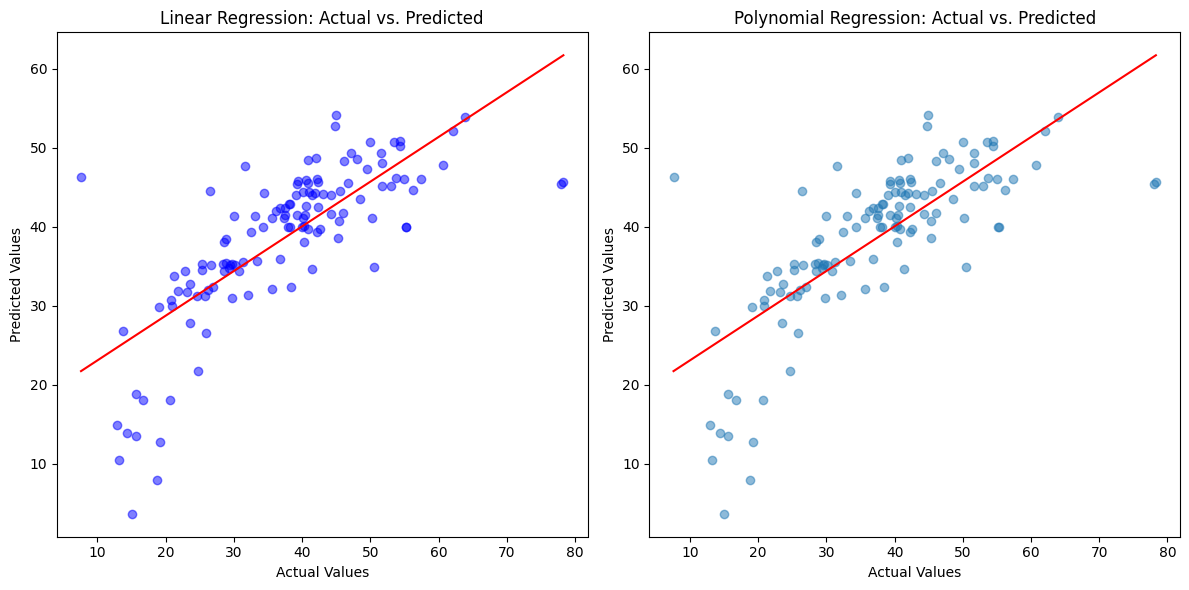

In [164]:
plt.figure(figsize=(12, 6))

# Linear Regression plot
plt.subplot(1, 2, 1)
plt.scatter(ytest, y_pred,color='blue', alpha=0.5)
plt.plot(np.unique(ytest), np.poly1d(np.polyfit(ytest, y_pred, 1))(np.unique(ytest)), color='red')
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Polynomial Regression plot
plt.subplot(1, 2, 2)
plt.scatter(ytest, y_pred, alpha=0.5)
plt.plot(np.unique(ytest), np.poly1d(np.polyfit(ytest, y_pred, 1))(np.unique(ytest)), color='red')
plt.title('Polynomial Regression: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

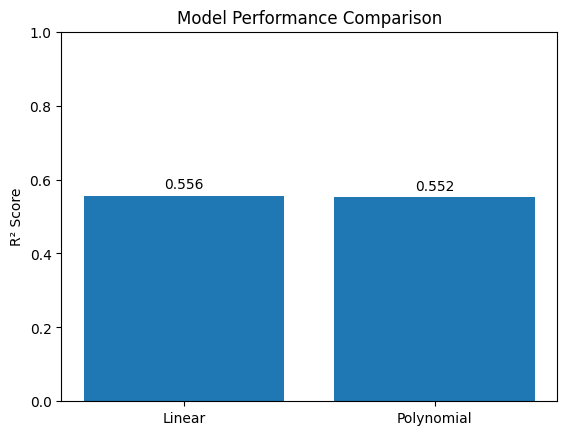

In [155]:
scores = [T1, T2]
models = ['Linear', 'Polynomial']

for i, score in enumerate(scores):
    plt.text(i, score+.02, f'{score:.3f}', ha='center')

plt.bar(models, scores)
plt.ylabel('R² Score')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.show()